A variogram is a tool that helps you understand the spatial structure of your data by describing how variance between data points changes with distance. It is essential in spatial modeling, particularly in geostatistics, and is commonly used in interpolation techniques like kriging.

The first step is to compute the empirical variogram of your data, which captures the spatial correlation structure. The variogram
𝛾
(
ℎ
)
γ(h) represents the variance of the differences between data points separated by a lag distance
ℎ
h.


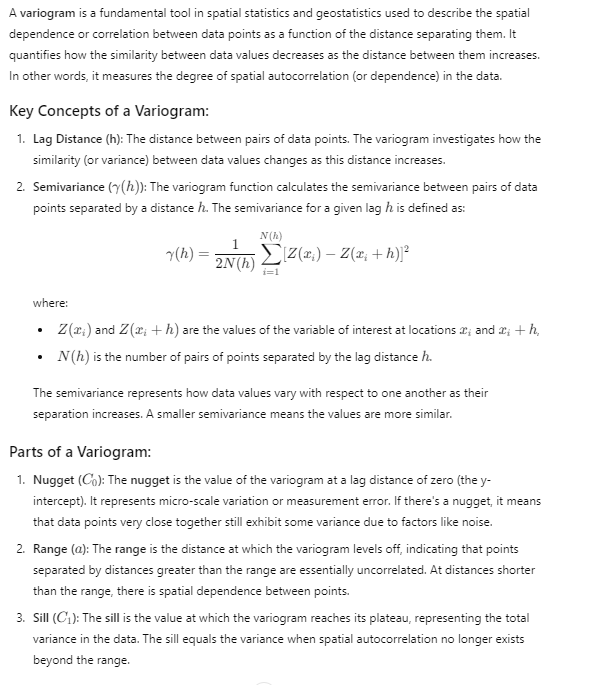

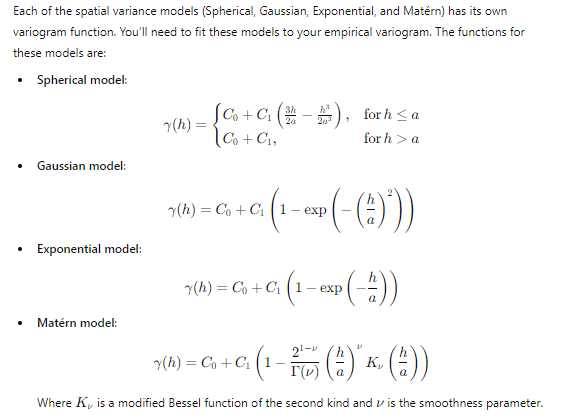

Example of Variogram Interpretation:
Imagine you have camera sensor data, where neighboring pixels tend to have similar values. A variogram helps quantify how similar pixel values are as you increase the distance between them. If nearby pixels (within the range) are highly correlated, the semivariance will be small. As the distance increases and the spatial correlation decreases, the semivariance will increase, approaching the sill.

In [1]:
!pip install pykrige scikit-gstat numpy matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 909.7/909.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 708.5/708.5 kB 10.8 MB/s eta 0:00:00


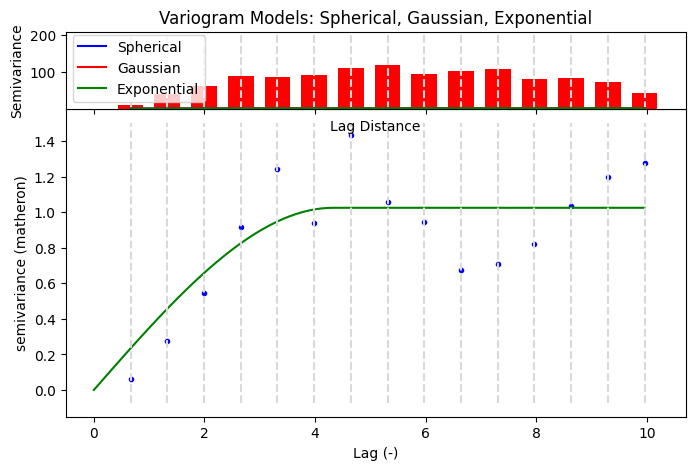

Spherical model parameters: [4.325216218372652, 1.0252380673233423, 0]
Gaussian model parameters: [3.98570015328301, 1.0315840372741019, 0]
Exponential model parameters: [5.870269187206155, 1.0650895555987392, 0]


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skgstat import Variogram

# Example data: Coordinates (x, y) and some values (z)
np.random.seed(42)  # for reproducibility
n_points = 50
x = np.random.uniform(0, 10, n_points)
y = np.random.uniform(0, 10, n_points)
z = np.sin(x) + np.cos(y) + np.random.normal(0, 0.1, n_points)  # some random spatial pattern

# Combine the coordinates into a 2D array
coords = np.column_stack([x, y])

# Compute the empirical variogram
V = Variogram(coords, z, normalize=False, maxlag=10, n_lags=15)

# Plot the empirical variogram using default plot method
V.plot()

# Fit Spherical, Gaussian, and Exponential models
V_spherical = Variogram(coords, z, normalize=False, maxlag=10, n_lags=15, model='spherical')
V_gaussian = Variogram(coords, z, normalize=False, maxlag=10, n_lags=15, model='gaussian')
V_exponential = Variogram(coords, z, normalize=False, maxlag=10, n_lags=15, model='exponential')

# Plot the models on the same figure
lags = V.bins

plt.plot(lags, V_spherical.fitted_model(lags), label='Spherical', color='blue')
plt.plot(lags, V_gaussian.fitted_model(lags), label='Gaussian', color='red')
plt.plot(lags, V_exponential.fitted_model(lags), label='Exponential', color='green')

# Add legends and labels
plt.legend()
plt.title('Variogram Models: Spherical, Gaussian, Exponential')
plt.xlabel('Lag Distance')
plt.ylabel('Semivariance')
plt.show()

# Print the model parameters for comparison
print(f"Spherical model parameters: {V_spherical.parameters}")
print(f"Gaussian model parameters: {V_gaussian.parameters}")
print(f"Exponential model parameters: {V_exponential.parameters}")


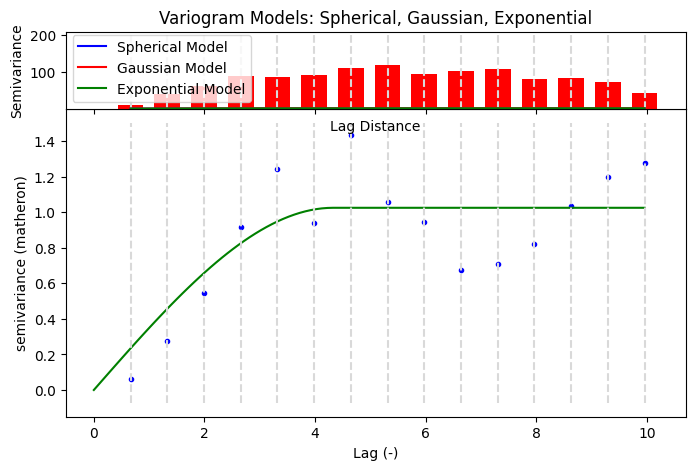

MSE for Spherical model: 1.5130
MSE for Gaussian model: 1.4927
MSE for Exponential model: 1.5465
Spherical model parameters: [4.325216218372652, 1.0252380673233423, 0]
Gaussian model parameters: [3.98570015328301, 1.0315840372741019, 0]
Exponential model parameters: [5.870269187206155, 1.0650895555987392, 0]


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from skgstat import Variogram
from sklearn.metrics import mean_squared_error

# Generate example data: Coordinates (x, y) and some values (z)
np.random.seed(42)  # for reproducibility
n_points = 50
x = np.random.uniform(0, 10, n_points)
y = np.random.uniform(0, 10, n_points)
z = np.sin(x) + np.cos(y) + np.random.normal(0, 0.1, n_points)  # some random spatial pattern

# Combine the coordinates into a 2D array
coords = np.column_stack([x, y])

# Compute the empirical variogram
V = Variogram(coords, z, normalize=False, maxlag=10, n_lags=15)

# Plot the empirical variogram
V.plot()

# Fit Spherical, Gaussian, and Exponential models
V_spherical = Variogram(coords, z, normalize=False, maxlag=10, n_lags=15, model='spherical')
V_gaussian = Variogram(coords, z, normalize=False, maxlag=10, n_lags=15, model='gaussian')
V_exponential = Variogram(coords, z, normalize=False, maxlag=10, n_lags=15, model='exponential')

# Get empirical semivariances and corresponding lags
empirical_semivariances = V.values
lags = V.bins

# Calculate fitted semivariances for each model
semivariances_spherical = V_spherical.fitted_model(lags)
semivariances_gaussian = V_gaussian.fitted_model(lags)
semivariances_exponential = V_exponential.fitted_model(lags)

# Ensure we compare only the valid values; filter out any NaN values if necessary
# Use only the empirical semivariances that correspond to the fitted lags
valid_indices = ~np.isnan(semivariances_spherical) & ~np.isnan(empirical_semivariances[:len(semivariances_spherical)])

# Compute the MSE for each model using only valid indices
mse_spherical = mean_squared_error(empirical_semivariances[:len(semivariances_spherical)][valid_indices], semivariances_spherical[valid_indices])
mse_gaussian = mean_squared_error(empirical_semivariances[:len(semivariances_gaussian)][valid_indices], semivariances_gaussian[valid_indices])
mse_exponential = mean_squared_error(empirical_semivariances[:len(semivariances_exponential)][valid_indices], semivariances_exponential[valid_indices])

# Plot the fitted models on the same figure
plt.plot(lags, semivariances_spherical, label='Spherical Model', color='blue')
plt.plot(lags, semivariances_gaussian, label='Gaussian Model', color='red')
plt.plot(lags, semivariances_exponential, label='Exponential Model', color='green')

# Add legends and labels
plt.legend()
plt.title('Variogram Models: Spherical, Gaussian, Exponential')
plt.xlabel('Lag Distance')
plt.ylabel('Semivariance')
plt.show()

# Print the MSE for each model
print(f"MSE for Spherical model: {mse_spherical:.4f}")
print(f"MSE for Gaussian model: {mse_gaussian:.4f}")
print(f"MSE for Exponential model: {mse_exponential:.4f}")

# Print the model parameters for comparison
print(f"Spherical model parameters: {V_spherical.parameters}")
print(f"Gaussian model parameters: {V_gaussian.parameters}")
print(f"Exponential model parameters: {V_exponential.parameters}")


MSE for Spherical model: 1.3923
MSE for Gaussian model: 1.3912
MSE for Exponential model: 1.3769
AIC for Spherical model: 80.9845
BIC for Spherical model: 86.7206
AIC for Gaussian model: 80.9252
BIC for Gaussian model: 86.6613
AIC for Exponential model: 80.1549
BIC for Exponential model: 85.8910
Spherical model parameters: [4.325216218372652, 1.0252380673233423, 0]
Gaussian model parameters: [3.98570015328301, 1.0315840372741019, 0]
Exponential model parameters: [5.870269187206155, 1.0650895555987392, 0]


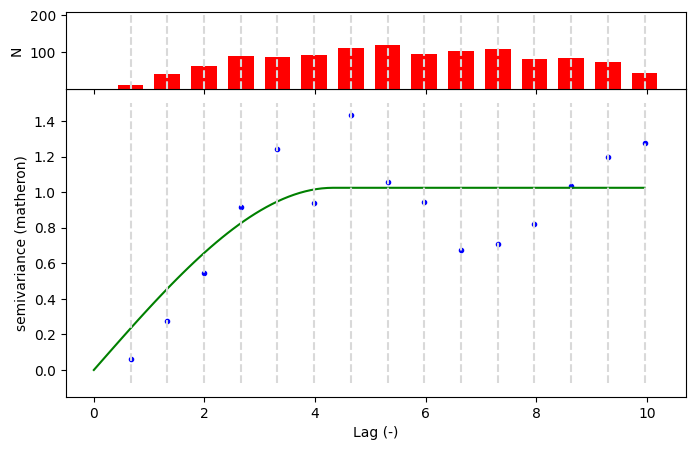

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from skgstat import Variogram
from sklearn.metrics import mean_squared_error
from scipy.interpolate import interp1d

# Generate example data: Coordinates (x, y) and some values (z)
np.random.seed(42)  # for reproducibility
n_points = 50
x = np.random.uniform(0, 10, n_points)
y = np.random.uniform(0, 10, n_points)
z = np.sin(x) + np.cos(y) + np.random.normal(0, 0.1, n_points)  # some random spatial pattern

# Combine the coordinates into a 2D array
coords = np.column_stack([x, y])

# Compute the empirical variogram
V = Variogram(coords, z, normalize=False, maxlag=10, n_lags=15)

# Plot the empirical variogram
V.plot()

# Fit Spherical, Gaussian, and Exponential models
V_spherical = Variogram(coords, z, normalize=False, maxlag=10, n_lags=15, model='spherical')
V_gaussian = Variogram(coords, z, normalize=False, maxlag=10, n_lags=15, model='gaussian')
V_exponential = Variogram(coords, z, normalize=False, maxlag=10, n_lags=15, model='exponential')

# Get empirical semivariances and corresponding lags
empirical_semivariances = V.values
lags = V.bins

# Interpolate fitted semivariances to match the length of empirical semivariances
interp_spherical = interp1d(lags, V_spherical.fitted_model(lags), bounds_error=False, fill_value="extrapolate")
interp_gaussian = interp1d(lags, V_gaussian.fitted_model(lags), bounds_error=False, fill_value="extrapolate")
interp_exponential = interp1d(lags, V_exponential.fitted_model(lags), bounds_error=False, fill_value="extrapolate")

# Create fitted semivariances with the same length as empirical semivariances
fitted_semivariances_spherical = interp_spherical(np.linspace(0, 10, len(empirical_semivariances)))
fitted_semivariances_gaussian = interp_gaussian(np.linspace(0, 10, len(empirical_semivariances)))
fitted_semivariances_exponential = interp_exponential(np.linspace(0, 10, len(empirical_semivariances)))

# Calculate the residuals for each model
residuals_spherical = empirical_semivariances - fitted_semivariances_spherical
residuals_gaussian = empirical_semivariances - fitted_semivariances_gaussian
residuals_exponential = empirical_semivariances - fitted_semivariances_exponential

# Calculate log-likelihood for each model
def log_likelihood(residuals):
    return -0.5 * np.sum((residuals ** 2) / np.var(empirical_semivariances))

ll_spherical = log_likelihood(residuals_spherical)
ll_gaussian = log_likelihood(residuals_gaussian)
ll_exponential = log_likelihood(residuals_exponential)

# Number of parameters in each model
k_spherical = len(V_spherical.parameters)
k_gaussian = len(V_gaussian.parameters)
k_exponential = len(V_exponential.parameters)

# Calculate AIC and BIC
def calculate_aic_bic(ll, k, n):
    aic = 2 * k - 2 * ll
    bic = np.log(n) * k - 2 * ll
    return aic, bic

n = len(empirical_semivariances)

aic_spherical, bic_spherical = calculate_aic_bic(ll_spherical, k_spherical, n)
aic_gaussian, bic_gaussian = calculate_aic_bic(ll_gaussian, k_gaussian, n)
aic_exponential, bic_exponential = calculate_aic_bic(ll_exponential, k_exponential, n)

# # Plot the fitted models on the same figure
# plt.plot(np.linspace(0, 10, len(empirical_semivariances)), fitted_semivariances_spherical, label='Spherical Model', color='blue')
# plt.plot(np.linspace(0, 10, len(empirical_semivariances)), fitted_semivariances_gaussian, label='Gaussian Model', color='red')
# plt.plot(np.linspace(0, 10, len(empirical_semivariances)), fitted_semivariances_exponential, label='Exponential Model', color='green')

# # Add legends and labels
# plt.scatter(lags, empirical_semivariances, label='Empirical Variogram', color='black')
# plt.legend()
# plt.title('Variogram Models: Spherical, Gaussian, Exponential')
# plt.xlabel('Lag Distance')
# plt.ylabel('Semivariance')
# plt.show()

# Print the MSE for each model
print(f"MSE for Spherical model: {mean_squared_error(empirical_semivariances, fitted_semivariances_spherical):.4f}")
print(f"MSE for Gaussian model: {mean_squared_error(empirical_semivariances, fitted_semivariances_gaussian):.4f}")
print(f"MSE for Exponential model: {mean_squared_error(empirical_semivariances, fitted_semivariances_exponential):.4f}")

# Print AIC and BIC values
print(f"AIC for Spherical model: {aic_spherical:.4f}")
print(f"BIC for Spherical model: {bic_spherical:.4f}")

print(f"AIC for Gaussian model: {aic_gaussian:.4f}")
print(f"BIC for Gaussian model: {bic_gaussian:.4f}")

print(f"AIC for Exponential model: {aic_exponential:.4f}")
print(f"BIC for Exponential model: {bic_exponential:.4f}")

# Print the model parameters for comparison
print(f"Spherical model parameters: {V_spherical.parameters}")
print(f"Gaussian model parameters: {V_gaussian.parameters}")
print(f"Exponential model parameters: {V_exponential.parameters}")


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from skgstat import Variogram
from sklearn.metrics import mean_squared_error
from scipy.interpolate import interp1d

# Generate example data: Coordinates (x, y) and some values (z)
np.random.seed(42)  # for reproducibility
n_points = 50
x = np.random.uniform(0, 10, n_points)
y = np.random.uniform(0, 10, n_points)
z = np.sin(x) + np.cos(y) + np.random.normal(0, 0.1, n_points)  # some random spatial pattern

# Combine the coordinates into a 2D array
coords = np.column_stack([x, y])

# Compute the empirical variogram
V = Variogram(coords, z, normalize=False, maxlag=10, n_lags=15)

# Get empirical semivariances and corresponding lags
empirical_semivariances = V.values
lags = V.bins

# Fit Spherical, Gaussian, and Exponential models
V_spherical = Variogram(coords, z, normalize=False, maxlag=10, n_lags=15, model='spherical')
V_gaussian = Variogram(coords, z, normalize=False, maxlag=10, n_lags=15, model='gaussian')
V_exponential = Variogram(coords, z, normalize=False, maxlag=10, n_lags=15, model='exponential')

# Interpolate fitted semivariances to match the length of empirical semivariances
interp_spherical = interp1d(lags, V_spherical.fitted_model(lags), bounds_error=False, fill_value="extrapolate")
interp_gaussian = interp1d(lags, V_gaussian.fitted_model(lags), bounds_error=False, fill_value="extrapolate")
interp_exponential = interp1d(lags, V_exponential.fitted_model(lags), bounds_error=False, fill_value="extrapolate")

# Create fitted semivariances with the same length as empirical semivariances
fitted_semivariances_spherical = interp_spherical(np.linspace(0, 10, len(empirical_semivariances)))
fitted_semivariances_gaussian = interp_gaussian(np.linspace(0, 10, len(empirical_semivariances)))
fitted_semivariances_exponential = interp_exponential(np.linspace(0, 10, len(empirical_semivariances)))

# Calculate the residuals for each model
residuals_spherical = empirical_semivariances - fitted_semivariances_spherical
residuals_gaussian = empirical_semivariances - fitted_semivariances_gaussian
residuals_exponential = empirical_semivariances - fitted_semivariances_exponential

# Calculate log-likelihood for each model
def log_likelihood(residuals):
    return -0.5 * np.sum((residuals ** 2) / np.var(empirical_semivariances))

ll_spherical = log_likelihood(residuals_spherical)
ll_gaussian = log_likelihood(residuals_gaussian)
ll_exponential = log_likelihood(residuals_exponential)

# Number of parameters in each model
k_spherical = len(V_spherical.parameters)
k_gaussian = len(V_gaussian.parameters)
k_exponential = len(V_exponential.parameters)

# Calculate AIC and BIC
def calculate_aic_bic(ll, k, n):
    aic = 2 * k - 2 * ll
    bic = np.log(n) * k - 2 * ll
    return aic, bic

n = len(empirical_semivariances)

aic_spherical, bic_spherical = calculate_aic_bic(ll_spherical, k_spherical, n)
aic_gaussian, bic_gaussian = calculate_aic_bic(ll_gaussian, k_gaussian, n)
aic_exponential, bic_exponential = calculate_aic_bic(ll_exponential, k_exponential, n)

# Plot the fitted models on the same figure
plt.figure(figsize=(10, 6))

# Ensure we are using valid lags based on the empirical semivariances
valid_lags = V.bins[:len(empirical_semivariances)]  # Ensure lags match the length of empirical semivariances

# Print lengths for debugging
print(f"Length of empirical semivariances: {len(empirical_semivariances)}")
print(f"Length of valid_lags: {len(valid_lags)}")

# Plot the empirical variogram if lengths match
if len(empirical_semivariances) == len(valid_lags):
    plt.scatter(valid_lags, empirical_semivariances, label='Empirical Variogram', color='black')

    # Plot the fitted models using the same lag distances
    plt.plot(valid_lags, fitted_semivariances_spherical[:len(valid_lags)], label='Spherical Model', color='blue')
    plt.plot(valid_lags, fitted_semivariances_gaussian[:len(valid_lags)], label='Gaussian Model', color='red')
    plt.plot(valid_lags, fitted_semivariances_exponential[:len(valid_lags)], label='Exponential Model', color='green')

    # Add legends and labels
    plt.legend()
    plt.title('Variogram Models: Spherical, Gaussian, Exponential')
    plt.xlabel('Lag Distance')
    plt.ylabel('Semivariance')
    plt.grid()
    plt.show()
else:
    print("Lengths do not match, cannot plot.")

# Print the MSE for each model
print(f"MSE for Spherical model: {mean_squared_error(empirical_semivariances, fitted_semivariances_spherical):.4f}")
print(f"MSE for Gaussian model: {mean_squared_error(empirical_semivariances, fitted_semivariances_gaussian):.4f}")
print(f"MSE for Exponential model: {mean_squared_error(empirical_semivariances, fitted_semivariances_exponential):.4f}")

# Print AIC and BIC values
print(f"AIC for Spherical model: {aic_spherical:.4f}")
print(f"BIC for Spherical model: {bic_spherical:.4f}")

print(f"AIC for Gaussian model: {aic_gaussian:.4f}")
print(f"BIC for Gaussian model: {bic_gaussian:.4f}")

print(f"AIC for Exponential model: {aic_exponential:.4f}")
print(f"BIC for Exponential model: {bic_exponential:.4f}")

# Print the model parameters for comparison
print(f"Spherical model parameters: {V_spherical.parameters}")
print(f"Gaussian model parameters: {V_gaussian.parameters}")
print(f"Exponential model parameters: {V_exponential.parameters}")


Length of empirical semivariances: 50
Length of valid_lags: 15
Lengths do not match, cannot plot.
MSE for Spherical model: 1.3923
MSE for Gaussian model: 1.3912
MSE for Exponential model: 1.3769
AIC for Spherical model: 80.9845
BIC for Spherical model: 86.7206
AIC for Gaussian model: 80.9252
BIC for Gaussian model: 86.6613
AIC for Exponential model: 80.1549
BIC for Exponential model: 85.8910
Spherical model parameters: [4.325216218372652, 1.0252380673233423, 0]
Gaussian model parameters: [3.98570015328301, 1.0315840372741019, 0]
Exponential model parameters: [5.870269187206155, 1.0650895555987392, 0]


<Figure size 1000x600 with 0 Axes>

Length of empirical semivariances: 50
Length of lags: 15


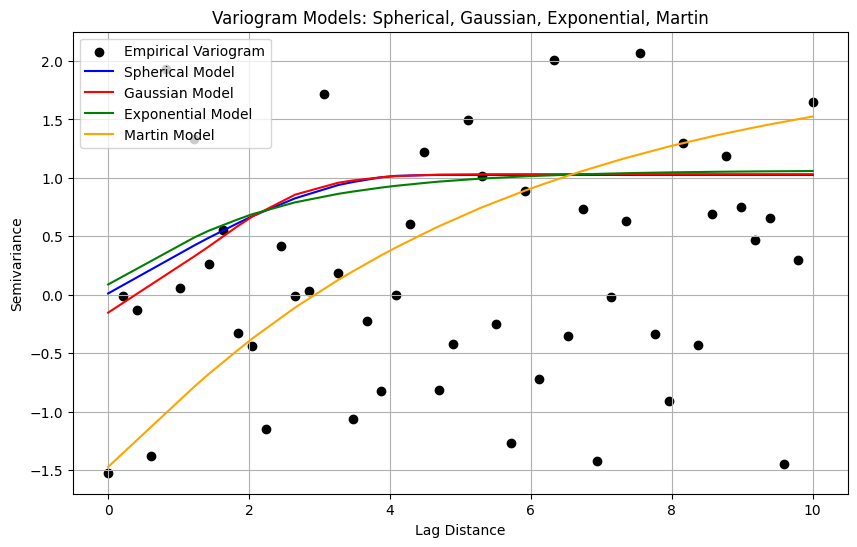

Empirical Semivariances Length: 50
Spherical Model Length: 50
Gaussian Model Length: 50
Exponential Model Length: 50
Martin Model Length: 50


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from skgstat import Variogram
from sklearn.metrics import mean_squared_error
from scipy.interpolate import interp1d

# Generate example data: Coordinates (x, y) and some values (z)
np.random.seed(42)  # for reproducibility
n_points = 50
x = np.random.uniform(0, 10, n_points)
y = np.random.uniform(0, 10, n_points)
z = np.sin(x) + np.cos(y) + np.random.normal(0, 0.1, n_points)  # some random spatial pattern

# Combine the coordinates into a 2D array
coords = np.column_stack([x, y])

# Compute the empirical variogram
V = Variogram(coords, z, normalize=False, maxlag=10, n_lags=15)

# Get empirical semivariances and corresponding lags
empirical_semivariances = V.values
lags = V.bins

# Check lengths
print(f"Length of empirical semivariances: {len(empirical_semivariances)}")
print(f"Length of lags: {len(lags)}")

# Fit Spherical, Gaussian, Exponential models
V_spherical = Variogram(coords, z, normalize=False, maxlag=10, n_lags=15, model='spherical')
V_gaussian = Variogram(coords, z, normalize=False, maxlag=10, n_lags=15, model='gaussian')
V_exponential = Variogram(coords, z, normalize=False, maxlag=10, n_lags=15, model='exponential')

# Define Martin variogram model function
def martin_model(h, c0, c, a):
    return c0 + c * (1 - np.exp(-h / a))  # Martin model equation

# Fit Martin model using the parameters from empirical semivariances
c0_guess = np.min(empirical_semivariances)
c_guess = np.max(empirical_semivariances) - c0_guess
a_guess = np.mean(lags)  # Initial guess for range parameter

# Create fitted Martin semivariances
fitted_semivariances_martin = martin_model(lags, c0_guess, c_guess, a_guess)

# Create interpolating functions to ensure lengths match
interp_spherical = interp1d(lags, V_spherical.fitted_model(lags), bounds_error=False, fill_value="extrapolate")
interp_gaussian = interp1d(lags, V_gaussian.fitted_model(lags), bounds_error=False, fill_value="extrapolate")
interp_exponential = interp1d(lags, V_exponential.fitted_model(lags), bounds_error=False, fill_value="extrapolate")
interp_martin = interp1d(lags, fitted_semivariances_martin, bounds_error=False, fill_value="extrapolate")

# Generate lags for plotting that match the empirical semivariances
valid_lags = np.linspace(0, 10, len(empirical_semivariances))

# Ensure all fitted semivariances match the empirical length
fitted_semivariances_spherical = interp_spherical(valid_lags)
fitted_semivariances_gaussian = interp_gaussian(valid_lags)
fitted_semivariances_exponential = interp_exponential(valid_lags)
fitted_semivariances_martin = interp_martin(valid_lags)

# Plot the empirical variogram
plt.figure(figsize=(10, 6))
plt.scatter(valid_lags, empirical_semivariances, label='Empirical Variogram', color='black')

# Plot the fitted models
plt.plot(valid_lags, fitted_semivariances_spherical, label='Spherical Model', color='blue')
plt.plot(valid_lags, fitted_semivariances_gaussian, label='Gaussian Model', color='red')
plt.plot(valid_lags, fitted_semivariances_exponential, label='Exponential Model', color='green')
plt.plot(valid_lags, fitted_semivariances_martin, label='Martin Model', color='orange')

# Add legends and labels
plt.legend()
plt.title('Variogram Models: Spherical, Gaussian, Exponential, Martin')
plt.xlabel('Lag Distance')
plt.ylabel('Semivariance')
plt.grid()
plt.show()  # Important to actually display the plot

# Print the lengths of the fitted models
print(f"Empirical Semivariances Length: {len(empirical_semivariances)}")
print(f"Spherical Model Length: {len(fitted_semivariances_spherical)}")
print(f"Gaussian Model Length: {len(fitted_semivariances_gaussian)}")
print(f"Exponential Model Length: {len(fitted_semivariances_exponential)}")
print(f"Martin Model Length: {len(fitted_semivariances_martin)}")


In [30]:
# Calculate AIC and BIC
def calculate_aic_bic(ll, k, n):
    aic = 2 * k - 2 * ll
    bic = np.log(n) * k - 2 * ll
    return aic, bic

n = len(empirical_semivariances)

aic_spherical, bic_spherical = calculate_aic_bic(ll_spherical, k_spherical, n)
aic_gaussian, bic_gaussian = calculate_aic_bic(ll_gaussian, k_gaussian, n)
aic_exponential, bic_exponential = calculate_aic_bic(ll_exponential, k_exponential, n)
# Print AIC and BIC values
print(f"AIC for Spherical model: {aic_spherical:.4f}")
print(f"BIC for Spherical model: {bic_spherical:.4f}")

print(f"AIC for Gaussian model: {aic_gaussian:.4f}")
print(f"BIC for Gaussian model: {bic_gaussian:.4f}")

print(f"AIC for Exponential model: {aic_exponential:.4f}")
print(f"BIC for Exponential model: {bic_exponential:.4f}")

# Print the model parameters for comparison
print(f"Spherical model parameters: {V_spherical.parameters}")
print(f"Gaussian model parameters: {V_gaussian.parameters}")
print(f"Exponential model parameters: {V_exponential.parameters}")

AIC for Spherical model: 80.9845
BIC for Spherical model: 86.7206
AIC for Gaussian model: 80.9252
BIC for Gaussian model: 86.6613
AIC for Exponential model: 80.1549
BIC for Exponential model: 85.8910
Spherical model parameters: [4.325216218372652, 1.0252380673233423, 0]
Gaussian model parameters: [3.98570015328301, 1.0315840372741019, 0]
Exponential model parameters: [5.870269187206155, 1.0650895555987392, 0]


In [37]:
# Define Martin variogram model function Special model best for large data
def martin_model(h, c0, c, a):
    return c0 + c * (1 - np.exp(-h / a))  # Martin model equation

# Fit Martin model using the parameters from empirical semivariances
c0_guess = np.min(empirical_semivariances)
c_guess = np.max(empirical_semivariances) - c0_guess
a_guess = np.mean(lags)  # Initial guess for range parameter

# Create fitted Martin semivariances
fitted_semivariances_martin = martin_model(lags, c0_guess, c_guess, a_guess)
print(f"Martin fitted length: {len(fitted_semivariances_martin)}")
print(f"Martin model parameters: c0={c0_guess}, c={c_guess}, a={a_guess}")

Martin fitted length: 15
Martin model parameters: c0=-1.5225623761540574, c=3.5932882317141144, a=5.309098741159665
